In [48]:
import mne
import os
from fooof import FOOOF
import numpy as np
import matplotlib as plt

In [10]:
path = 'Raws_new_ica/'
folder = os.fsencode(path)
filename = os.fsdecode('patient2_raw.fif')
raw = mne.io.read_raw(path+filename)

Opening raw data file Raws_new_ica/patient2_raw.fif...
    Range : 0 ... 1144499 =      0.000 ...  4577.996 secs
Ready.


In [20]:
data_1chan = raw.get_data(picks='Cz')

In [24]:
events_from_annot, event_dict = mne.events_from_annotations(raw=raw)
epochs = mne.Epochs(raw, events_from_annot, event_id=event_dict, tmin=-0.2, tmax=15, picks='Cz', proj=True, baseline=None, preload=True, event_repeated='merge', on_missing='warn')

Used Annotations descriptions: ['Detections Inactive', 'Familiar voice', 'Impedance', 'Medical staff', 'Montage is now: ComAvgLwR', 'Montage is now: LongLwR', 'Montage is now: TransLwR', 'Resting']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
28 matching events found
No baseline correction applied
0 projection items activated
Loading data for 28 events and 3801 original time points ...
1 bad epochs dropped


In [77]:
def foof_params(epoch):
    psd = epoch.compute_psd()
    psds, freqs = psd.get_data(return_freqs=True)
    fm = FOOOF()
    #print(psds, freqs)
    fm.fit(freqs,psds[0][0])
    fig = fm.plot(plt_log=False, title='Aperiodic curve for patient number 2')
    slope = -fm.get_params('aperiodic_params','exponent')
    slope_mean = np.mean(slope)
    slope_std = np.std(slope)
    #fig.title('Patient number 2')
    #plt.show()
    return [slope_mean, slope_std]

    Using multitaper spectrum estimation with 7 DPSS windows



FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.


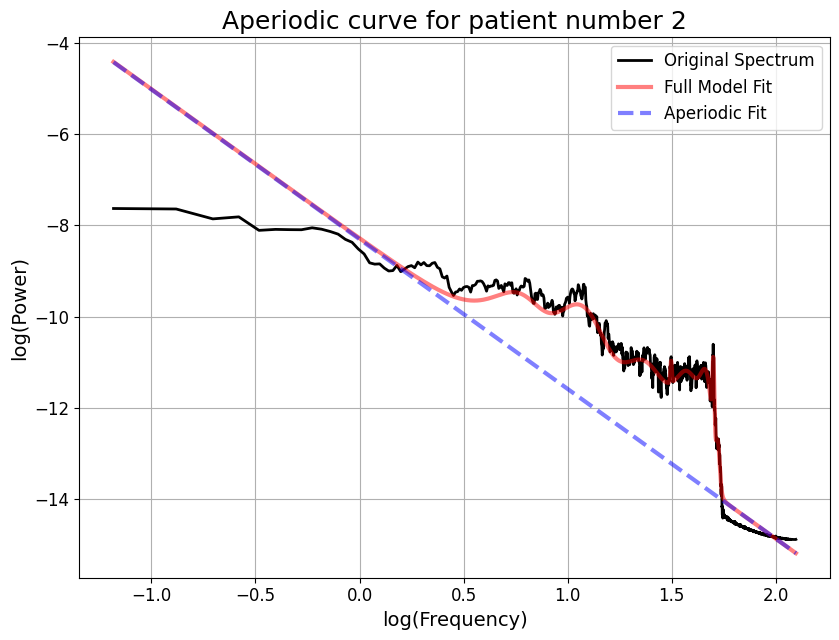

In [75]:
results1 = foof_params(epoch=epochs['Resting'][0])

In [76]:
results1 # with log freq

[-3.2789582270503947, 0.0]

    Using multitaper spectrum estimation with 7 DPSS windows

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
[-3.2789582270503947, 0.0]


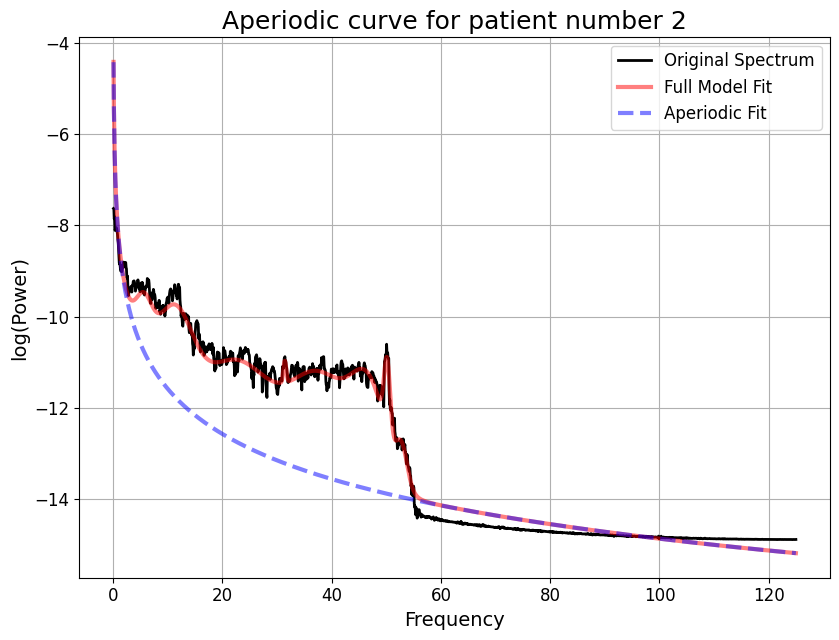

In [78]:
results2 = foof_params(epoch=epochs['Resting'][0])
print(results2) # no log freq